In [34]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [43]:
df = pd.read_csv('..//output//final.csv')

In [44]:
df.head()

,Graph number,Number of vertices,starting colour vertex,ending colour vertex,loop,cycle,step time
0,1,2,"[1, 1]","[1, 1]",yes,1,1
1,1,2,"[1, -1]","[1, -1]",yes,1,2
2,1,3,"[1, 1, 1]","[1, 1, 1]",yes,1,1
3,1,3,"[1, 1, -1]","[1, 1, 1]",yes,2,1
4,1,3,"[1, -1, 1]","[1, 1, 1]",yes,2,1


<AxesSubplot:xlabel='Number of vertices', ylabel='count'>

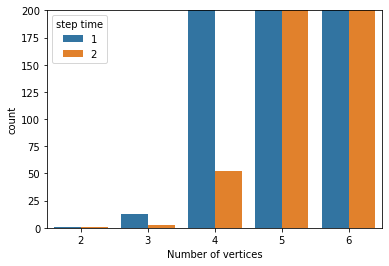

In [55]:
plt.ylim(0, 200)
sns.countplot(x="Number of vertices", hue="step time",  data=df)

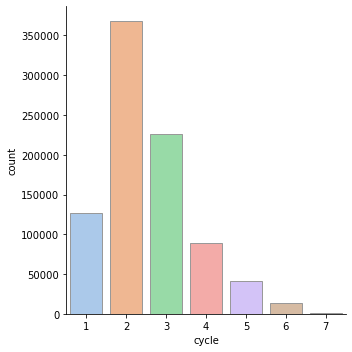

In [52]:
sns.catplot(x="cycle", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)